# 📗 Projet 1 – Modèle de Heston (Volatilité stochastique)

Ce notebook illustre le **modèle de Heston**, très utilisé en finance quantitative pour modéliser la volatilité stochastique des prix d’actifs financiers.

---

## 🔢 1. Import des librairies


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize


📈 2. Simulation du modèle de Heston

Le modèle est défini par :

dSt=μStdt+vtStdWtS
dS
t
	​

=μS
t
	​

dt+
v
t
	​


In [2]:

def heston_simulation(S0, v0, mu, kappa, theta, sigma, rho, T=1, N=252, M=1000):
    dt = T/N
    S = np.zeros((M, N+1))
    v = np.zeros((M, N+1))
    S[:,0], v[:,0] = S0, v0

    for t in range(1, N+1):
        Z1 = np.random.normal(size=M)
        Z2 = rho * Z1 + np.sqrt(1-rho**2) * np.random.normal(size=M)

        v[:,t] = np.abs(v[:,t-1] + kappa*(theta - v[:,t-1])*dt + sigma*np.sqrt(v[:,t-1]*dt)*Z2)
        S[:,t] = S[:,t-1] * np.exp((mu - 0.5*v[:,t-1])*dt + np.sqrt(v[:,t-1]*dt)*Z1)

    return S, v


📊 3. Exemple de simulation

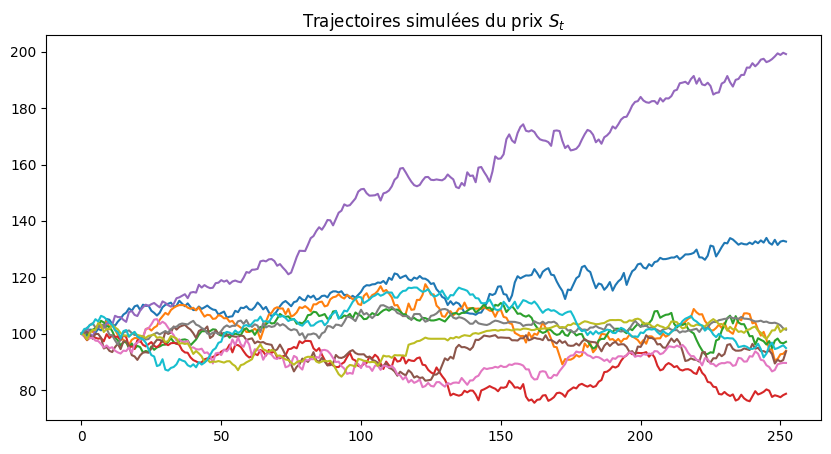

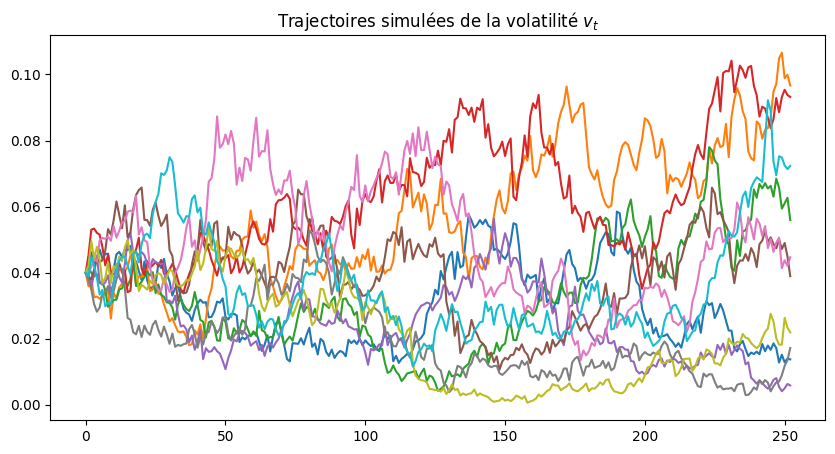

In [3]:

S, v = heston_simulation(S0=100, v0=0.04, mu=0.05, kappa=2.0, theta=0.04, sigma=0.3, rho=-0.7)

plt.figure(figsize=(10,5))
plt.plot(S[:10].T)
plt.title("Trajectoires simulées du prix $S_t$")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(v[:10].T)
plt.title("Trajectoires simulées de la volatilité $v_t$")
plt.show()


💰 4. Pricing d’une option européenne par Monte Carlo

In [4]:

def european_call_mc(S, K, r=0.01, T=1):
    ST = S[:,-1]
    payoff = np.maximum(ST-K,0)
    return np.exp(-r*T)*np.mean(payoff)

call_price = european_call_mc(S, K=100)
print(f"Prix estimé du call (Monte Carlo) : {call_price:.4f}")


Prix estimé du call (Monte Carlo) : 10.4057


5. Calibration (bonus)

On suppose qu’on a des prix de marché (ici simulés).
On minimise la différence entre prix du modèle et prix observés.

In [5]:
# Exemple simplifié : calibration sur un seul strike
def objective(params, market_price, S0=100, K=100, T=1, r=0.01):
    kappa, theta, sigma, v0, rho = params
    S, v = heston_simulation(S0, v0, 0.05, kappa, theta, sigma, rho, T=T)
    model_price = european_call_mc(S, K, r, T)
    return (model_price - market_price)**2

# Supposons un prix observé
market_price = 10.0
x0 = [2.0, 0.04, 0.3, 0.04, -0.7]
res = minimize(objective, x0, args=(market_price,), bounds=[(0.1,5),(0.01,0.1),(0.01,1),(0.01,0.1),(-0.9,0.9)])
print("Paramètres calibrés :", res.x)


Paramètres calibrés : [ 2.00000016  0.04        0.30000004  0.04       -0.69999991]
